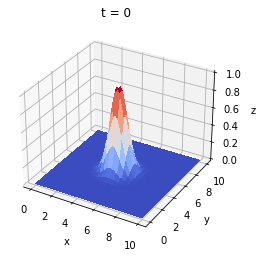

In [1]:
import pandas as pd
from numpy import exp
from numpy import linalg
import numpy as np
import math 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure


#Inizializzo la griglia
x_up = 10
x_down = 0
y_up = 10
y_down = 0
c_f = 0.5
a = 1
T=20
Nx=51
Ny = 51
v = 1
dx = (x_up - x_down)/(Nx - 1)
dy = (y_up - y_down)/(Ny - 1)
dt = c_f *dx/v
Nt = math.ceil(T/dt) + 1
x = np.linspace(x_down, x_up, Nx)
y = np.linspace(y_down, y_up, Ny)
t = np.linspace(0, T, Nt)
X,Y= np.meshgrid(x,y)

#Inizializzo il dato iniziale
x_0 = 5
y_0 = 5

 
u_0 = exp(-(X-x_0)**2) * exp(-(Y-y_0)**2) 

###Applico Leapfrog
#Inizializzo la matrice della soluzione
U = np.zeros((Nx,Ny,Nt))

#inizializzo il dato iniziale
U[:,:,0]= u_0


   
#situazione iniziale

X,Y= np.meshgrid(x,y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, U[:,:,0], cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('t = 0')
#plt.savefig('t=0.png')
plt.show()



In [2]:
def succ(i,imax,succ_imax):
    if i == imax:
        return succ_imax
    elif i < imax:
        return i + 1
    else:
        raise ValueError('index_problem')

def prec(i,imin,prec_imin):
    if i == imin:
        return prec_imin
    elif i > imin:
        return  i - 1
    else:
        raise ValueError('index_problem')


ixmin = 0
prec_ixmin = Nx-2
ixmax = Nx-1
succ_ixmax = 1

iymin = 0
prec_iymin = Ny-2
iymax = Ny-1
succ_iymax = 1

ix = list(range(Nx))
iy = list(range(Ny))

U[:,:,1]= u_0
#applico leapfrog
for n in range (1,Nt-1):
    for i in range (Nx):
        for j in range (Ny):
            U[i,j,n+1] = 2*U[i,j,n] - U[i,j,n-1] + (c_f**2) * (U[succ(i,ixmax,succ_ixmax),j,n] - 2*U[i,j,n] + U[prec(i,ixmin,prec_ixmin),j,n]) + (c_f**2) * (U[i,succ(j,iymax,succ_iymax),n] - 2*U[i,j,n] + U[i,prec(j,iymin,prec_iymin),n])
 
    


In [3]:
#faccio il video


for i in range (Nt):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, U[:,:,i], cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_zlim(0,1)
    ax.set_title('t = ' + str(i*20/200) +'s')
    #plt.savefig('_'+str(i)+'_.png')
    #if (i*20/200) == 2 or (i*20/200)==3 or (i*20/200)==5 or (i*20/200)==10 or (i*20/200)==15 or (i*20/200)==20:
        #plt.savefig('t='+str(i*20/200)+'.png')
    plt.close()
    

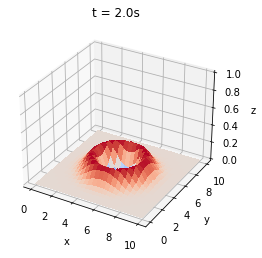

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, U[:,:,20], cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim(0,1)
ax.set_title('t = ' + str(20*20/200) +'s')
plt.savefig('t='+str(20*20/200)+'.png')


In [5]:
U_norm = np.zeros([Nt])

for i in range (Nt):
    U_norm[i] = linalg.norm(U[:,:,i])

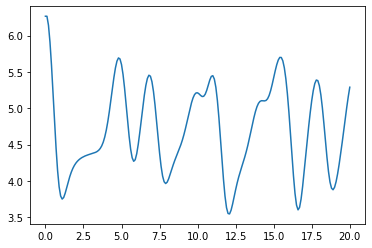

In [6]:
plt.plot(t, U_norm)
plt.show()